<a href="https://colab.research.google.com/github/mariivalverde/An-lisis-de-datos/blob/main/Ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: Instalar librerías necesarias (solo la primera vez)
!pip install yfinance beautifulsoup4 lxml pandas matplotlib


In [ ]:
!pip install yfinance beautifulsoup4 lxml pandas matplotlib

# Paso 2: Importar las librerías

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Pregunta 1: Extraer y mostrar datos de acciones de Tesla


In [ ]:
import yfinance as yf
import time

tesla = yf.Ticker("TSLA")
try:
    tesla_data = tesla.history(period="max")
except yf.YFRateLimitError:
    print("Rate limited. Waiting 60 seconds...")
    time.sleep(60)  # Wait for 60 seconds
    tesla_data = tesla.history(period="max") # Retry fetching data

tesla_data.reset_index(inplace=True)
print("Tesla Stock Data (head)")
print(tesla_data.head())

Tesla Stock Data (head)
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


# Pregunta 2: Webscraping de ingresos de Tesla


In [ ]:
url_tsla = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_tsla = requests.get(url_tsla, headers={"User-Agent": "Mozilla/5.0"}).text
soup_tsla = BeautifulSoup(html_tsla, "lxml")

# Buscar TODAS las tablas que contengan la palabra 'Quarterly Revenue'
tables = soup_tsla.find_all("table")

# Revisar el contenido para encontrar la tabla correcta
for i, table in enumerate(tables):
    if "Quarterly Revenue" in table.text:
        target_index = i
        break

# Extraer la tabla correctamente
tesla_revenue = pd.read_html(str(tables[target_index]))[0]
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)
tesla_revenue.tail()

<ipython-input-5-c5912559267f>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables[target_index]))[0]


,Date,Revenue
59,2010-06-30,28
60,2010-03-31,21
61,2009-12-31,NaN
62,2009-09-30,46
63,2009-06-30,27


# Pregunta 3: Extraer y mostrar datos de acciones de GameStop


In [ ]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("GameStop Stock Data (head)")
print(gme_data.head())


GameStop Stock Data (head)
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


# Pregunta 4: Webscraping de ingresos de GameStop

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_gme = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_gme = requests.get(url_gme, headers={"User-Agent": "Mozilla/5.0"}).text
soup_gme = BeautifulSoup(html_gme, "lxml")

# Buscar TODAS las tablas
gme_tables = soup_gme.find_all("table")

# Encontrar la tabla que contiene 'Quarterly Revenue'
for i, table in enumerate(gme_tables):
    if "Quarterly Revenue" in table.text:
        target_index = i
        break

# Extraer esa tabla
gme_revenue = pd.read_html(str(gme_tables[target_index]))[0]
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[$,]", "", regex=True)
gme_revenue.tail()

<ipython-input-9-f890de834f03>:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(gme_tables[target_index]))[0]


,Date,Revenue
60,2010-01-31,3524
61,2009-10-31,1835
62,2009-07-31,1739
63,2009-04-30,1981
64,2009-01-31,3492


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Revenue').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Revenue')):
  _plot_series(series, series_name, i)
  fig.legend(title='Revenue', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Date')):
  _plot_series(series, series_name, i)
  fig.legend(title='Date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Date'}, axis=1)
              .sort_values('Date', ascending=True))
  xs = counted['Date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Revenue')):
  _plot_series(series, series_name, i)
  fig.legend(title='Revenue', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Revenue'].value_counts()
    for x_label, grp in _df_8.groupby('Date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Date')
_ = plt.ylabel('Revenue')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='index', y='Date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Revenue'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='Revenue', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)


# Pregunta 5: Gráfico de acciones de Tesla

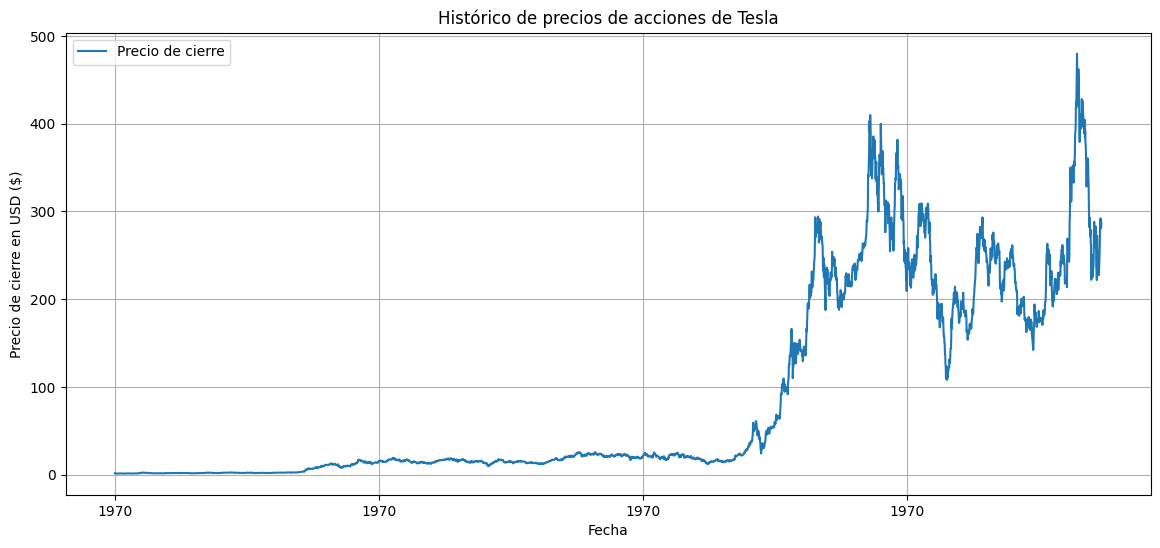

In [ ]:
def make_graph(stock_data, title):
    # Convertir a tipo fecha si no está ya
    stock_data['Date'] = pd.to_datetime(stock_data.index)

    # Crear gráfico
    plt.figure(figsize=(14, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label="Precio de cierre")
    plt.title(title)
    plt.xlabel('Fecha')
    plt.ylabel('Precio de cierre en USD ($)')
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(tesla_data, "Histórico de precios de acciones de Tesla")

# Pregunta 6: Gráfico de acciones de GameStop

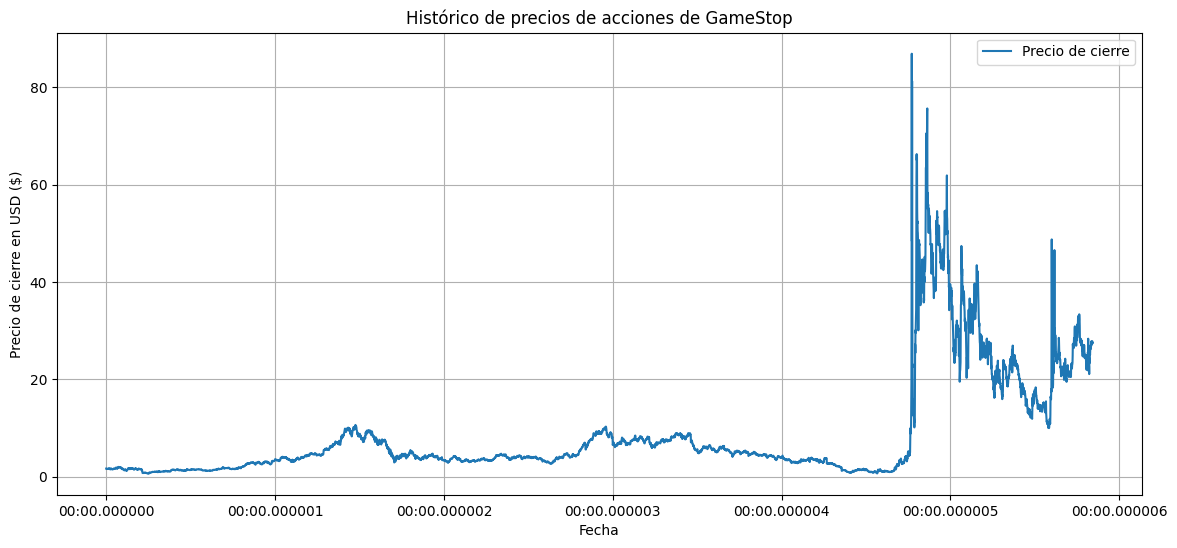

In [ ]:
make_graph(gme_data, "Histórico de precios de acciones de GameStop")